### Mass Evolution Statistics

In [1]:
import haccytrees.mergertrees
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.pyplot import cm
from matplotlib.lines import Line2D
import pandas as pd
from astropy.cosmology import FlatLambdaCDM
import astropy.units as u
from itertools import groupby
from matplotlib.ticker import ScalarFormatter
%load_ext line_profiler
%reload_ext autoreload
%autoreload 1
%aimport help_func

pyfftw not available, using numpy fft


In [2]:
forest_table = pd.read_hdf('/data/a/cpac/aurora/reducedtrees.h5', 'ft')
with open("/data/a/cpac/xinliu/reducedtrees/progenitor_idx0.txt") as f:
    progenitor_idx = [[int(p) for p in s.strip().split(" ")] if s.strip() != "" else [] for s in f]

In [22]:
progenitor_idx[6207994]

[6079969,
 6198622,
 6204367,
 6204394,
 6204396,
 6204426,
 6204431,
 6204453,
 6204455]

In [2]:
# New files, 1/26/2021
#forest, progenitor_array = haccytrees.mergertrees.read_forest('/data/a/cpac/mbuehlmann/LastJourney/forest/m000p.forest.000.hdf5',
                                                              #'LastJourney', nchunks=10, chunknum=0)

In [4]:
type(progenitor_idx)

list

In [66]:
(len(progenitor_idx) > 1)

True

In [39]:
#len(progenitor_idx)
#type(progenitor_idx)
progenitor_idx[1030734]

[965476]

In [14]:
mass_fof = forest['fof_halo_mass']
mass_fof[forest['snapnum'] == 100]

array([7.8804492e+10, 3.2337016e+11, 9.7826267e+10, ..., 1.0869585e+11,
       5.9782717e+10, 6.5217511e+10], dtype=float32)

#### Establish Globals

In [3]:
n = 10
snap = 100
snap2 = 99
snap3 = 98
thresholds = [5*10**11]
thresholds_are_absolute = True
norm = np.int(2.7*10**9)
xaxis = 'z_nums'
extremum = ''
my_range = [10**13, 10**14]
my_range_str = ["{:.2e}".format(my_range[0]), "{:.2e}".format(my_range[1])]
#bins = [10**9.5, 10**10.5, 10**11.5, 10**12.5, 10**13.5, 10**14.5]
small_bins = [10**11.5, 10**12.5, 10**13.5, 10**14.5]
large_bins = [10**9.5, 10**10.5, 10**11.5, 10**12.5, 10**13.5, 10**14.5]
large_bins2 = [10**12, 10**12.5, 10**13, 10**13.5, 10**14, 10**14.5]
rangel_bins = [1*10**11, 1.5*10**11, 2.3*10**11, 3.5*10**11, 5.3*10**11, 8.1*10**11, 1.2*10**12, 1.9*10**12, 2.8*10**12, 4.3*10**12, 6.6*10**12, 1*10**13]
rangel_bins2 = np.concatenate(([rangel_bins[0] - 0.25*10**11], [(rangel_bins[i] + rangel_bins[i+1]) / 2 for i in np.arange(len(rangel_bins) -1)], [rangel_bins[-1] + 3.4*10**13]), axis = 0)
norm_tf = True
avg_tf = True
# Convert snapshots to redshifts
redshifts = np.flip(np.array([10.044, 9.8065, 9.5789, 9.3608, 9.1515, 8.7573, 8.5714, 8.3925, 8.0541, 7.8938, 7.7391, 7.4454, 7.3058, 7.04, 6.9134, 6.6718, 6.5564, 6.3358, 6.1277, 6.028, 5.8367, 5.6556, 5.4839, 5.3208, 5.2422, 5.0909, 4.9467, 4.7429, 4.6145, 4.4918, 4.3743, 4.2618, 4.1015, 4.00, 3.8551, 3.763, 3.6313, 3.5475, 3.4273, 3.3133, 3.205, 3.102, 3.0361, 2.9412, 2.8506, 2.7361, 2.6545, 2.5765, 2.4775, 2.4068, 2.3168, 2.2524, 2.1703, 2.0923, 2.018, 1.9472, 1.8797, 1.7994, 1.7384, 1.68, 1.6104, 1.5443, 1.4938, 1.4334, 1.3759, 1.321, 1.2584, 1.2088, 1.152, 1.1069, 1.0552, 1.006, 0.9591, 0.9143, 0.8646, 0.824, 0.7788, 0.7358, 0.6948, 0.6557, 0.6184, 0.5777, 0.5391, 0.5022, 0.4714, 0.4337, 0.4017, 0.3636, 0.3347, 0.3035, 0.2705, 0.2423, 0.2123, 0.1837, 0.1538, 0.1279, 0.1008, 0.0749, 0.0502, 0.0245, 0.00]))
forest_masses = np.array(forest_table['mass'])
forest_snapnums = np.array(forest_table['snap_num'])
thresholds = [1/10, 0.3]

#### 1a) Full mass evolution: one halo

5584944

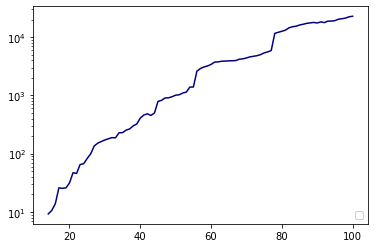

In [20]:
# Find just one halo
halo_idx = 6207994
xaxis = 'snap_nums'
# Track them
time_nums, masses, main_prog_list, major_mergers, major_merger_times, LMMs, LMM_times, fossil_groups = help_func.track_evol(halo_idx, redshifts, progenitor_idx, forest_masses, forest_snapnums, thresholds, x_axis = xaxis)
#main_prog_list
snap_nums = np.linspace(100, 0, 101)
# Plot them
help_func.plot_evol([snap_nums], [masses], x_axis = xaxis)
main_prog_list[5]

#### 1b) Full mass evolution: multiple halos

In [14]:
# Find some halos
n = 10
halo_idx = help_func.find_halos(forest_table, snap, n, extremum = 'max')
halo_idx
# Track them
#time_nums, masses, main_prog_list, major_mergers, major_merger_times, LMMs, LMM_times, fossil_groups = help_func.track_evol_multiple(halo_idx, redshifts, progenitor_idx, forest_masses, forest_snapnums, thresholds, x_axis = xaxis)
#main_prog_list
# Plot them
#help_func.plot_evol(time_nums, masses, "mass_evol_10_max_z", extremum = 'max', quant = n)

0


array([], dtype=int64)

#### 1c) Average (binned) mass evolution

In [15]:
# Find halos and put them in bins
bin_halo_idx = help_func.bin_halos(forest_table, snap, large_bins)
# Track evolution of those halos
#bin_z_nums, bin_masses, bin_main_prog_list, major_mergers = help_func.track_evol_binned(bin_halo_idx, bins, redshifts, progenitor_idx, forest_table)
# Average the masses for each bin of halos
avg_timesteps, avg_masses = help_func.avg_bins(bin_halo_idx, large_bins, redshifts, progenitor_idx, forest_table)

n:  0  out of:  4


IndexError: list index out of range

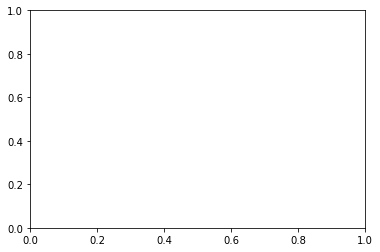

In [16]:
# Plot them
help_func.plot_evol(avg_timesteps, avg_masses, forest_table, "mass_evol_binned_avg", large_bins, avg = avg_tf)

#### 1d) Normalized average mass evolution

In [ ]:
# Find halos and put them in bins
bin_halo_idx = help_func.bin_halos(forest_table, snap, large_bins)
# Average the masses for each bin of halos
norm_avg_timesteps, norm_avg_masses = help_func.avg_bins(bin_halo_idx, large_bins, redshifts, progenitor_idx, forest_table, norm_tf)
# Plot them
help_func.plot_evol(norm_avg_timesteps, norm_avg_masses, "mass_evol_binned", bins, avg_tf, norm_tf)

#### 1e) Tracking major mergers: one halo

first target idx:  6207440
first set of progenitors:  [6079407, 6079886, 6140997, 6175520, 6177187, 6180746, 6180747, 6193203, 6193211, 6195986, 6195989, 6196013, 6196015, 6196148, 6199376, 6199382, 6199393, 6199526, 6205849, 6205855, 6205856, 6205861, 6205862, 6205884, 6205885, 6205887, 6205896, 6205897, 6205898, 6205900, 6205907, 6205910, 6205940, 6205953, 6205955, 6205956, 6205964, 6205991, 6205998, 6205999, 6206014, 6206021, 6206033, 6206037, 6206059, 6206060, 6206061, 6206062, 6206064, 6206072, 6206074, 6206082, 6206083, 6206152, 6206283, 6206321, 6206352, 6206367]


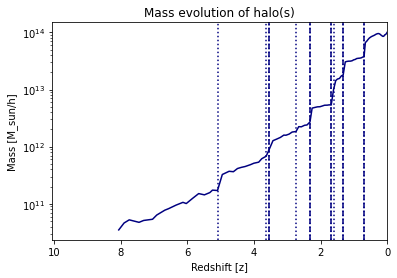

In [4]:
# Choose just one halo, and choose x-axis (z_nums or snap_nums)
halo_id = 6207440
xaxis = 'z_nums'
# Track the halo
snap_nums, masses, main_prog_list, maj_mergers, major_merger_times = help_func.track_evol(halo_id, redshifts, prog_idx = progenitor_idx, forest_tbl = forest_table, mm_thresh_small = mm_thresh1, mm_thresh_big = mm_thresh2, x_axis = xaxis)
# Plot them
help_func.plot_evol([snap_nums], [masses], forest_table, major_mergers = [maj_mergers], x_axis = xaxis)

#### 1f) Tracking major mergers: multiple halos

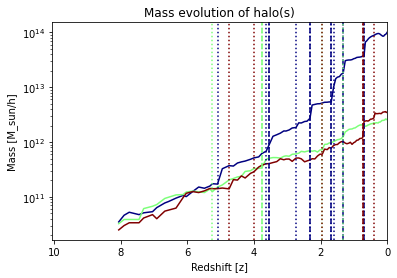

In [23]:
#halo_id = 6207440
halo_idx = [6207440, 6207441, 6207442]
xaxis = 'z_nums'
# Track the halo
snap_nums, masses, main_prog_list, maj_mergers, major_merger_times = help_func.track_evol_multiple(halo_idx, redshifts, prog_idx = progenitor_idx, forest_tbl = forest_table, mm_thresh_small = mm_thresh1, mm_thresh_big = mm_thresh2, x_axis = xaxis)
# Plot them
help_func.plot_evol(snap_nums, masses, forest_table, major_mergers = maj_mergers, x_axis = xaxis)

##### Am I sure that it's just a coincidence that all these halos end at exactly z = 8?